In [11]:
import glob
# Store all the image path in a list.
image_paths = sorted(glob.glob('./images/*jpg'))
print(image_paths)

['./images\\cat.jpg', './images\\dog.jpg', './images\\elephant.jpg', './images\\fish.jpg', './images\\horse.jpg', './images\\lion.jpg', './images\\rabit.jpg', './images\\snake.jpg']


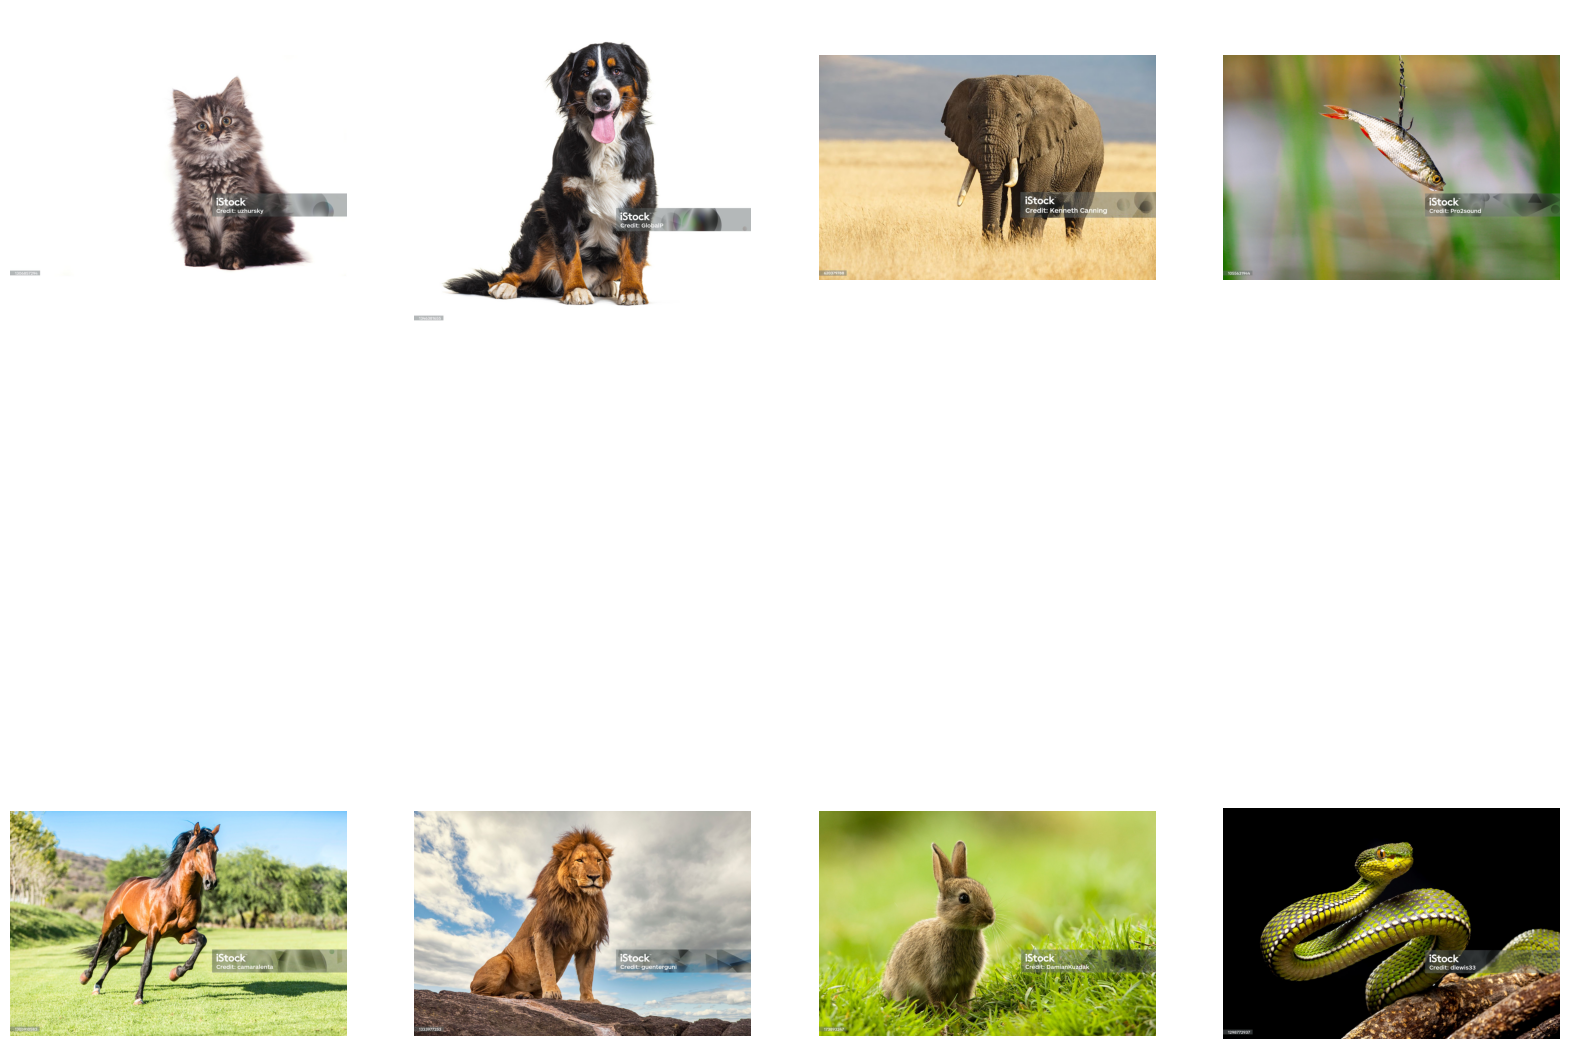

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 18))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2, 4, idx + 1)
    plt.imshow(image)
    plt.axis('off')

In [13]:
import tensorflow as tf
model_vgg16 = tf.keras.applications.vgg16.VGG16()
model_resnet50 = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

In [14]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


In [21]:
def process_images(model, image_paths, size, preprocess_input, display_top_k = False, top_k = 2):
    plt.figure(figsize = (20, 7))
    for idx, image_path in enumerate(image_paths):
        # Read the image using Tensorflow.
        tf_image = tf.io.read_file(image_path)

        # Decode the above 'tf_image' from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)
        
        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)

        # Add a batch dimension to the first axis (required)
        image_batch = tf.expand_dims(image_resized, axis = 0)

        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)

        # Forward pass throught the model to make predictions.
        preds = model.predict(image_batch)

        # Decode and rank top-k predictions.
        # Return a list of tuples: (class-ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds = preds,
            top = 5
        )

        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class: Pr(Class = {:20} [index = {:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))

        plt.subplot(2, 4, idx + 1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize = 16)

1/1 [==============================] - 0s 311ms/step


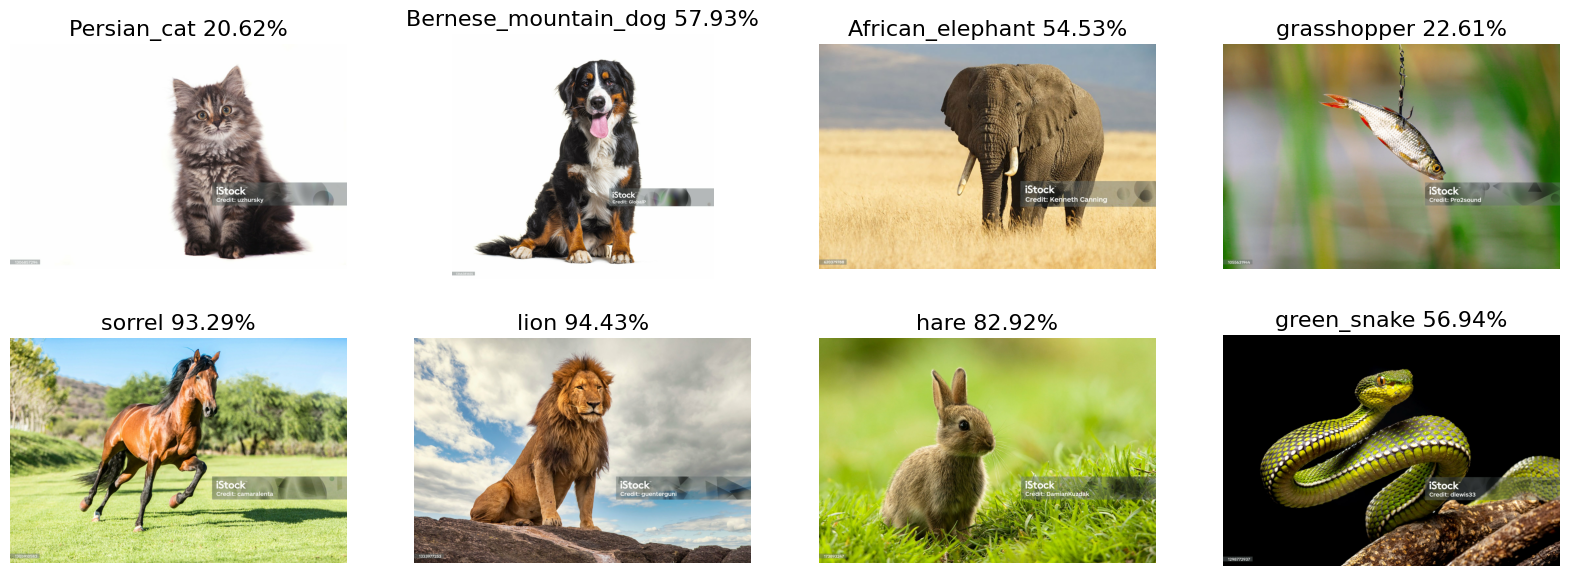

In [22]:
model = model_vgg16
size = (224, 224)

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 [==============================] - 0s 229ms/step


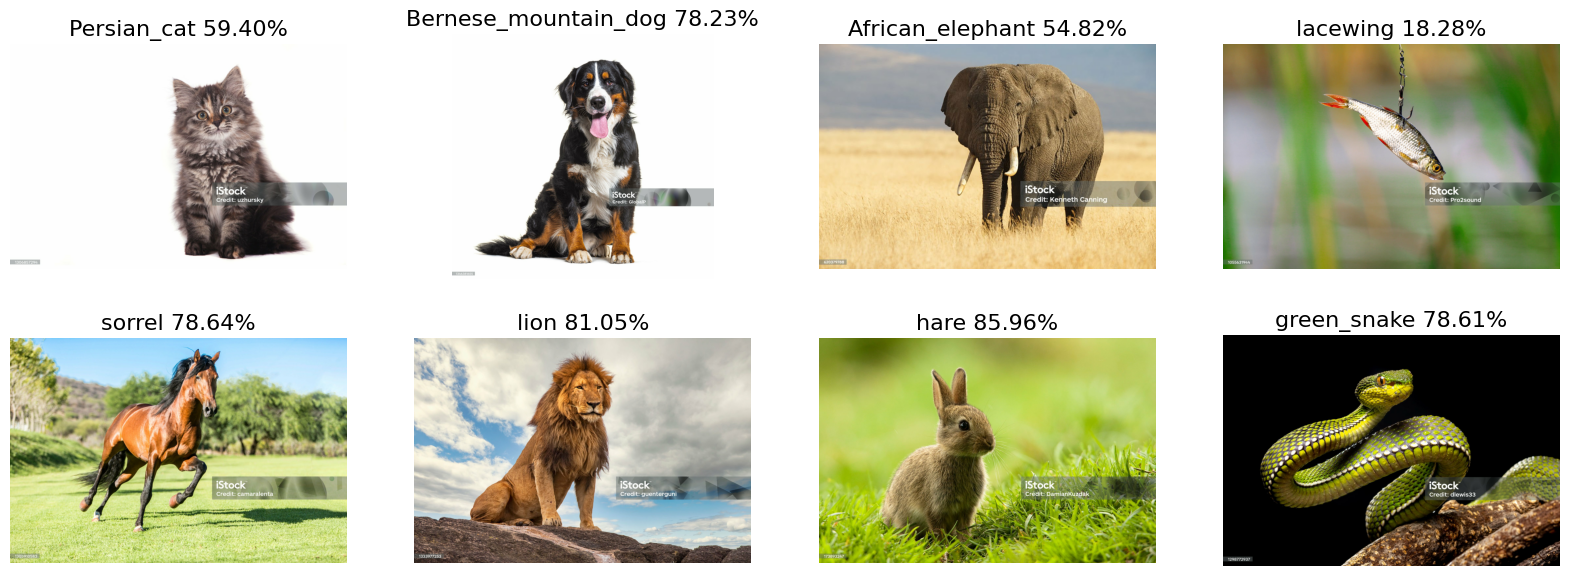

In [24]:
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 [==============================] - 3s 3s/step
Top 1 predicted class: Pr(Class = Persian_cat          [index =    0]) = 95.76
Top 2 predicted class: Pr(Class = tabby                [index =    1]) =  0.47
1/1 [==============================] - 0s 272ms/step
Top 1 predicted class: Pr(Class = Bernese_mountain_dog [index =    0]) = 68.23
Top 2 predicted class: Pr(Class = Appenzeller          [index =    1]) = 16.24
1/1 [==============================] - 0s 273ms/step
Top 1 predicted class: Pr(Class = African_elephant     [index =    0]) = 75.72
Top 2 predicted class: Pr(Class = tusker               [index =    1]) = 11.95
1/1 [==============================] - 0s 280ms/step
Top 1 predicted class: Pr(Class = lacewing             [index =    0]) = 50.80
Top 2 predicted class: Pr(Class = dragonfly            [index =    1]) =  9.16
1/1 [==============================] - 0s 296ms/step
Top 1 predicted class: Pr(Class = sorrel               [index =    0]) = 60.53
Top 2 predicted class: Pr(C

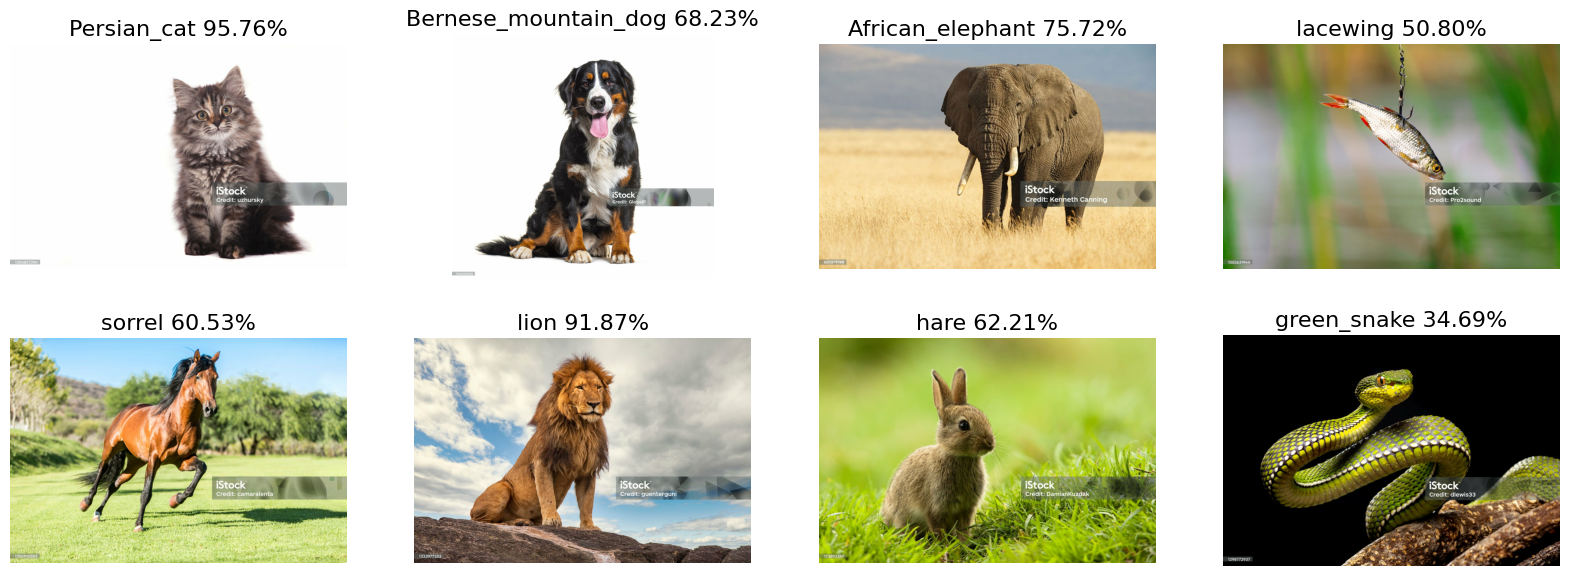

In [30]:
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k = True)

In [33]:
model_efficient_net_b7 = tf.keras.applications.EfficientNetB7()

268326632/268326632 [==============================] - 126s 0us/step


In [37]:
print(model_efficient_net_b7.input_shape)

(None, 600, 600, 3)


1/1 [==============================] - 15s 15s/step
Top 1 predicted class: Pr(Class = tabby                [index =    0]) = 50.02
Top 2 predicted class: Pr(Class = Persian_cat          [index =    1]) = 20.14
1/1 [==============================] - 3s 3s/step
Top 1 predicted class: Pr(Class = Bernese_mountain_dog [index =    0]) = 48.09
Top 2 predicted class: Pr(Class = Appenzeller          [index =    1]) = 22.57
1/1 [==============================] - 3s 3s/step
Top 1 predicted class: Pr(Class = African_elephant     [index =    0]) = 49.53
Top 2 predicted class: Pr(Class = tusker               [index =    1]) = 28.33
1/1 [==============================] - 3s 3s/step
Top 1 predicted class: Pr(Class = long-horned_beetle   [index =    0]) = 16.96
Top 2 predicted class: Pr(Class = dragonfly            [index =    1]) = 10.86
1/1 [==============================] - 3s 3s/step
Top 1 predicted class: Pr(Class = sorrel               [index =    0]) = 71.20
Top 2 predicted class: Pr(Class = har

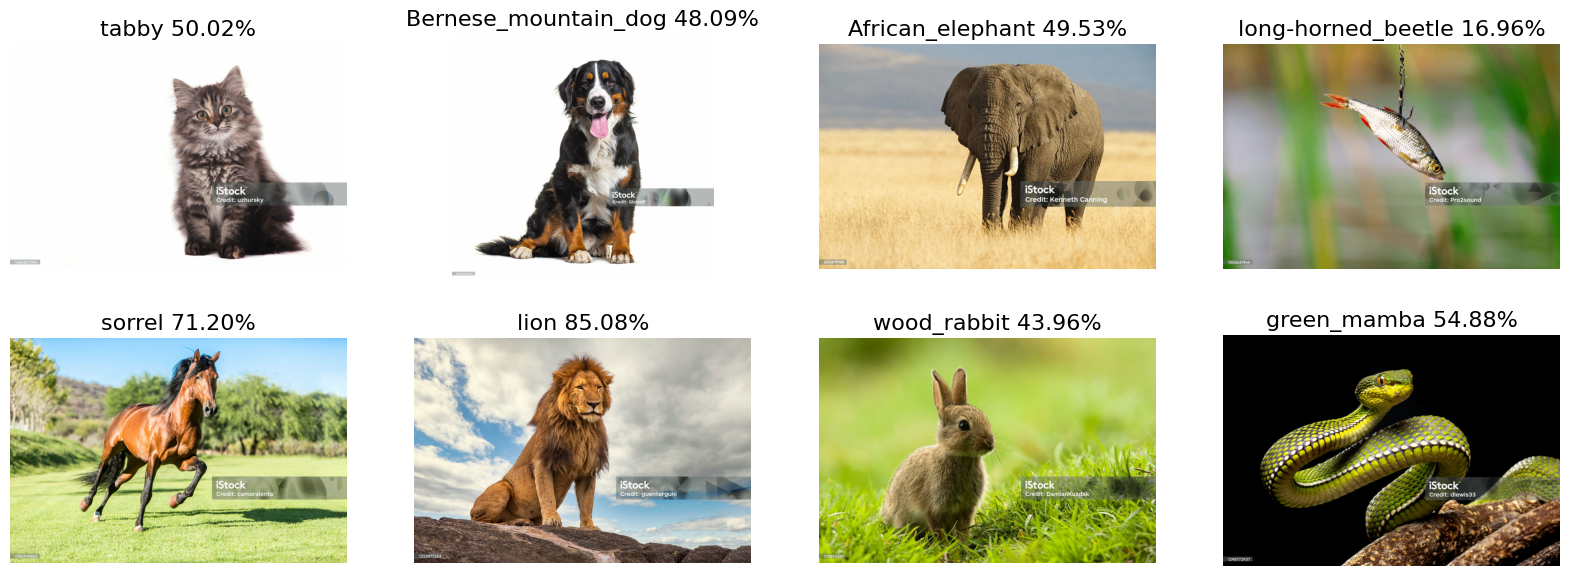

In [38]:
model = model_efficient_net_b7
size = (600, 600)

preprocess_input = tf.keras.applications.efficientnet.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k = True)